# **Naive-Bayes Classifier**

It is basoed on the Naive Bayes theorem  states that 'the probability of a hypothesis (or class) given some observed evidence can be calculated by assuming that the features (or predictors) are conditionally independent of each other, even if they are not.'

Naive Bayes algorithm is a simple yet powerful classification technique based on Bayes' theorem. It assumes that the features are independent given the class label, which is a strong assumption but often works well in practice. 

This algorithm is particularly effective for text classification tasks, such as spam detection and sentiment analysis. It is a widely used classification algorithm based on Bayes' theorem. 

It is particularly effective for text classification tasks, such as spam detection and sentiment analysis. 
The algorithm assumes that the features are independent given the class label, which simplifies the computation of probabilities. 

Despite its simplicity, Naive Bayes often performs surprisingly well in practice, especially for large datasets. 

It is computationally efficient and can handle high-dimensional data effectively. The algorithm is particularly useful for text classification tasks, such as spam detection and sentiment analysis, where the independence assumption holds reasonably well. 

Naive Bayes is also easy to implement and interpret, making it a popular choice for many machine learning applications. It is often used as a baseline model for comparison with more complex algorithms. 

The algorithm can be applied to both binary and multiclass classification problems, and it can handle continuous and categorical features. Naive Bayes is a probabilistic classifier, meaning it predicts the probability of each class label given the input features, allowing for uncertainty in predictions. 

It is of 3 types:
1. Gaussian Naive Bayes - It assumes that the features follow a Gaussian (normal) distribution. It is suitable for continuous data.
2. Multinomial Naive Bayes - It is used for discrete data, particularly for text classification tasks where the features represent word counts or frequencies.
3. Bernoulli Naive Bayes - It is similar to Multinomial Naive Bayes but assumes binary features (0 or 1). It is also used for text classification tasks, especially when the presence or absence of a feature is more important than its frequency.

In [218]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [219]:
num_items = 1000
data = {
    'City_Population': np.random.randint(10000, 1000000, num_items),
    'Continent': np.random.choice(['Asia', 'Europe', 'North America', 'South America'], num_items),
    'Venue_Capacity': np.random.randint(500, 20000, num_items),
    'Day_Of_Week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], num_items),
    'Multiple_Concerts': np.random.randint(0, 2, num_items),
    'Sold_Out': np.random.randint(0, 2, num_items)
}

df = pd.DataFrame(data)
display(df)

,City_Population,Continent,Venue_Capacity,Day_Of_Week,Multiple_Concerts,Sold_Out
0,286868,South America,6503,Saturday,0,0
1,162885,South America,11286,Thursday,1,1
2,313817,Europe,14690,Sunday,1,1
3,140733,North America,13366,Thursday,0,1
4,339541,South America,6398,Tuesday,1,1
...,...,...,...,...,...,...
995,208407,South America,19931,Thursday,1,1
996,35137,North America,3770,Monday,1,0
997,784001,North America,1716,Friday,1,0
998,929754,North America,18919,Wednesday,1,1


In [220]:
df2 = pd.get_dummies(df[['Continent', 'Day_Of_Week']])

In [221]:
df2.head()

,Continent_Asia,Continent_Europe,Continent_North America,Continent_South America,Day_Of_Week_Friday,Day_Of_Week_Monday,Day_Of_Week_Saturday,Day_Of_Week_Sunday,Day_Of_Week_Thursday,Day_Of_Week_Tuesday,Day_Of_Week_Wednesday
0,False,False,False,True,False,False,True,False,False,False,False
1,False,False,False,True,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,False,True,False,False
4,False,False,False,True,False,False,False,False,False,True,False


In [222]:
df3 = pd.concat([df, df2], axis=1)

In [223]:
df3.head()

,City_Population,Continent,Venue_Capacity,Day_Of_Week,Multiple_Concerts,Sold_Out,Continent_Asia,Continent_Europe,Continent_North America,Continent_South America,Day_Of_Week_Friday,Day_Of_Week_Monday,Day_Of_Week_Saturday,Day_Of_Week_Sunday,Day_Of_Week_Thursday,Day_Of_Week_Tuesday,Day_Of_Week_Wednesday
0,286868,South America,6503,Saturday,0,0,False,False,False,True,False,False,True,False,False,False,False
1,162885,South America,11286,Thursday,1,1,False,False,False,True,False,False,False,False,True,False,False
2,313817,Europe,14690,Sunday,1,1,False,True,False,False,False,False,False,True,False,False,False
3,140733,North America,13366,Thursday,0,1,False,False,True,False,False,False,False,False,True,False,False
4,339541,South America,6398,Tuesday,1,1,False,False,False,True,False,False,False,False,False,True,False


In [224]:
df4 = df3.drop(['Continent', 'Day_Of_Week'], axis=1)

In [225]:
df4.head()

,City_Population,Venue_Capacity,Multiple_Concerts,Sold_Out,Continent_Asia,Continent_Europe,Continent_North America,Continent_South America,Day_Of_Week_Friday,Day_Of_Week_Monday,Day_Of_Week_Saturday,Day_Of_Week_Sunday,Day_Of_Week_Thursday,Day_Of_Week_Tuesday,Day_Of_Week_Wednesday
0,286868,6503,0,0,False,False,False,True,False,False,True,False,False,False,False
1,162885,11286,1,1,False,False,False,True,False,False,False,False,True,False,False
2,313817,14690,1,1,False,True,False,False,False,False,False,True,False,False,False
3,140733,13366,0,1,False,False,True,False,False,False,False,False,True,False,False
4,339541,6398,1,1,False,False,False,True,False,False,False,False,False,True,False


In [226]:
X = df4.drop(['Sold_Out'], axis=1)
y = df4['Sold_Out']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(800, 14)

(800,)

(200, 14)

(200,)

In [229]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [230]:
# var_smoothing is a hyperparameter that can be tuned. It controls the amount of variance added to the model to prevent overfitting
# priors are the class prior probabilities, which can be set to None to use the empirical distribution of the training data
# priors is set to None, meaning the model will learn the class prior probabilities from the training data
# other priors values are possible, such as [0.5, 0.5] for a binary classification problem
# fit_prior is a boolean that indicates whether to learn the class prior probabilities from the training data
# fit_prior=True means the model will learn the class prior probabilities from the training data
gnb = GaussianNB(var_smoothing=1e-9, priors=None)
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [231]:
y_pred = gnb.predict(X_test_scaled)
display(y_pred)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [232]:
print("Gaussian NB Score: ", gnb.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))    
print("Classification Report:\n", classification_report(y_test, y_pred))

Gaussian NB Score:  0.525
Confusion Matrix:
 [[61 34]
 [75 30]]
Accuracy Score: 0.455
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.64      0.53        95
           1       0.47      0.29      0.36       105

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.44       200
weighted avg       0.46      0.46      0.44       200



d:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [233]:
# alpha is a hyperparameter that can be tuned. It controls the smoothing of the model.
# fit_prior is a boolean that indicates whether to learn the class prior probabilities from the training data
# Here, fit_prior=True means the model will learn the class prior probabilities from the training data
# class_prior is set to None, meaning the model will learn the class prior probabilities from the training data
# class_prior = None is the default value, meaning the model will learn the class prior probabilities from the training data
mnb = MultinomialNB( alpha=1.0, fit_prior=True, class_prior=None)
mnb.fit(X_train, y_train)

MultinomialNB()

In [234]:
y_pred_2 = mnb.predict(X_test)
display(y_pred_2)

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0])

In [235]:
print("Multinomial NB Score: ", gnb.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_2))
print("Accuracy Score:", accuracy_score(y_test, y_pred_2))    
print("Classification Report:\n", classification_report(y_test, y_pred_2))

Multinomial NB Score:  0.525
Confusion Matrix:
 [[45 50]
 [41 64]]
Accuracy Score: 0.545
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.47      0.50        95
           1       0.56      0.61      0.58       105

    accuracy                           0.55       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.55      0.54       200



d:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [236]:
bnb = BernoulliNB(alpha=0.5, fit_prior=True, class_prior=None)
bnb.fit(X_train, y_train)

BernoulliNB(alpha=0.5)

In [237]:
y_pred_3 = bnb.predict(X_test)
display(y_pred_3)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [238]:
print("Bernoulli NB Score: ", gnb.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_3))
print("Accuracy Score:", accuracy_score(y_test, y_pred_3))    
print("Classification Report:\n", classification_report(y_test, y_pred_3))

d:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Bernoulli NB Score:  0.525
Confusion Matrix:
 [[61 34]
 [75 30]]
Accuracy Score: 0.455
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.64      0.53        95
           1       0.47      0.29      0.36       105

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.44       200
weighted avg       0.46      0.46      0.44       200



In [239]:
from sklearn.model_selection import GridSearchCV

params = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# param_grid is a dictionary where keys are parameter names and values are lists of settings to try
# cv is the number of folds in cross-validation. It determines how many times the training data is split into training and validation sets.
# In this case, cv=5 means that the training data will be split into 5 parts, and the model will be trained and validated 5 times with each part being used as a validation set once.
# more cv value means more robust evaluation but also longer computation time and higher resource usage 
# scoring is the metric used to evaluate the model performance during cross-validation
# scoring='accuracy' means that the model will be evaluated based on its accuracy
# other scoring metrics can also be used, such as 'f1', 'roc_auc', etc.
grid_search = GridSearchCV(gnb, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [240]:
y_pred_4 = grid_search.predict(X_test)
display(y_pred_4)

d:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [241]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best Estimator:\n", grid_search.best_estimator_)
print("Best Score: ", grid_search.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_4))
print("Accuracy Score:", accuracy_score(y_test, y_pred_4))
print("Classification Report:\n", classification_report(y_test, y_pred_4))

Best parameters found:  {'var_smoothing': 0.1873817422860384}
Best cross-validation score:  0.515
Best Estimator:
 GaussianNB(var_smoothing=0.1873817422860384)
Best Score:  0.525
Confusion Matrix:
 [[  0  95]
 [  0 105]]
Accuracy Score: 0.525
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.53      1.00      0.69       105

    accuracy                           0.53       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.28      0.53      0.36       200



d:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   City_Population    1000 non-null   int32 
 1   Continent          1000 non-null   object
 2   Venue_Capacity     1000 non-null   int32 
 3   Day_Of_Week        1000 non-null   object
 4   Multiple_Concerts  1000 non-null   int32 
 5   Sold_Out           1000 non-null   int32 
dtypes: int32(4), object(2)
memory usage: 31.4+ KB


(       City_Population  Venue_Capacity  Multiple_Concerts     Sold_Out
 count      1000.000000     1000.000000         1000.00000  1000.000000
 mean     510483.853000    10105.591000            0.49000     0.493000
 std      285444.891645     5533.345369            0.50015     0.500201
 min       10168.000000      503.000000            0.00000     0.000000
 25%      264412.000000     5418.250000            0.00000     0.000000
 50%      507162.500000    10028.000000            0.00000     0.000000
 75%      777412.250000    14528.250000            1.00000     1.000000
 max      999622.000000    19993.000000            1.00000     1.000000,
 None,
 City_Population       int32
 Continent            object
 Venue_Capacity        int32
 Day_Of_Week          object
 Multiple_Concerts     int32
 Sold_Out              int32
 dtype: object,
 array([[<Axes: title={'center': 'City_Population'}>,
         <Axes: title={'center': 'Venue_Capacity'}>],
        [<Axes: title={'center': 'Multiple_Con

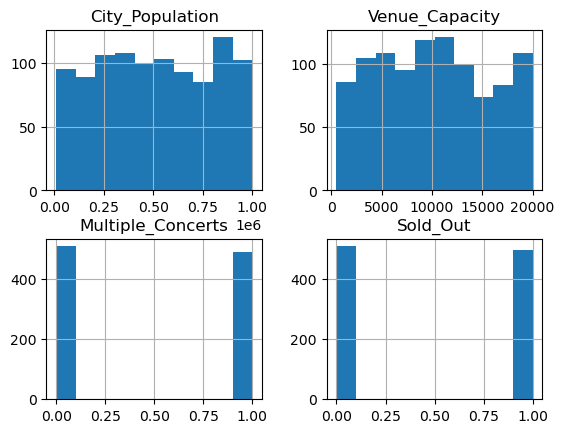

In [242]:
df.describe(), df.info(), df.dtypes, df.hist()